## Построение модели линейной одномерной регрессии


### Цель работы

изучение принципов построения модели линейной одномерной регрессии.

### Задачи 

 - реализовать кoнвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения.


### Теория

Для решения задачи одномерной регрессии удобно использовать универсальный пайплайн предварительной обработки данных. 
К имеющемусяя шаблонному коду необходимо добавить код для обучения модели, интерпретации и визуализации результатов.
Линейная регрессия – метод восстановления зависимости между двумя переменными. 
Пусть задана модель регрессии – параметрическое семейство функций $𝑔(x, \alpha)$, где $\alpha \in ℝ^p$  – вектор параметров модели. 
Определим функционал качества аппроксимации целевой зависимости на выборке $𝑋^ℓ^ как сумму квадратов ошибок

\begin{equation}
\label{1}\tag{1}
Q(\alpha, X^l) = \sum\limits_{i=1}^{l}(g(x_i, \alpha) - y_i)^2.
\end{equation}

Обучение по методу наименьших квадратов (МНК) состоит в том, чтобы найти вектор параметров 𝛼∗, при котором достигается минимум среднего
квадрата ошибки на заданной обучающей выборке $𝑋^l$:

\begin{equation}
\label{2}\tag{2}
\alpha^{*} = \arg\min\limits_{\alpha \in  ℝ^p} Q(\alpha, X^l).
\end{equation}

Стандартный способ решения этой оптимизационной задачи – воспользоваться необходимым условием минимума. 
Если функция $𝑔(x, \alpha)$ достаточное число раз дифференцируема по $\alpha$, то в точке минимума выполняется система $𝑝$ уравнений относительно $𝑝$ неизвестных

\begin{equation}
\label{3}\tag{3}
\cfrac{\partial Q}{\partial \alpha}(\alpha, X^l) = 2 \sum\limits_{i=1}^{l} (g(x_i, \alpha) - y_i)\cfrac{\partial g}{\partial \alpha} (x_i, \alpha) = 0.
\end{equation}


С использованием библиотек машинного обучения формулы (1) – (2) можно реализовать автоматически, но следует понимать, что конкретно
реализует каждый метод

### Ход работы

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Подготовка данных

In [28]:
dataset = pd.read_csv('./Student_Marks.csv')
dataset.head(10)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
93,8,6.471,42.426
94,8,3.919,24.451
95,6,3.561,19.128
96,3,0.301,5.609


In [33]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[4.508]
 [0.096]
 [3.133]
 [7.909]
 [7.811]]
Зависимая переменная
[19.202  7.734 13.811 53.018 55.299]


In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, :])
X_without_nan = X.copy()
X_without_nan[:, :] = imputer.transform(X[:, :])
print(X[:5])

[[4.508]
 [0.096]
 [3.133]
 [7.909]
 [7.811]]


#### 2. Построение модели классификации на основе линейной регрессии

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[ 4.92351402 24.55272899 19.40136996 18.18798775  6.55054926 37.81168735
 33.66412633 11.10624793 43.98890588 21.7619499  35.48419965 29.84748773
 43.21675356 25.69441135 20.9456746  23.43310813 13.43373563 22.17008756
 38.49007831 26.44450217 10.70914103 22.01014172 45.74279471 16.00941514
 13.48888937]


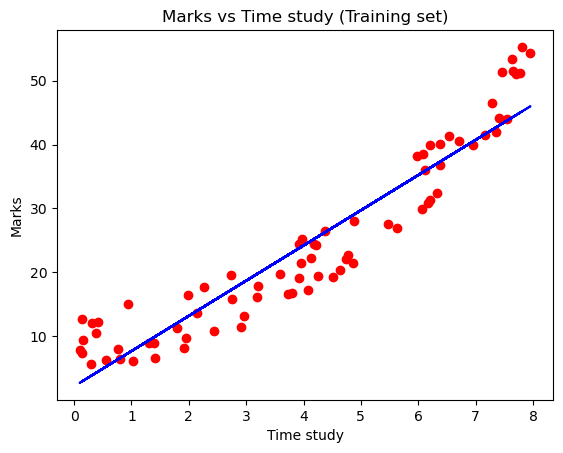

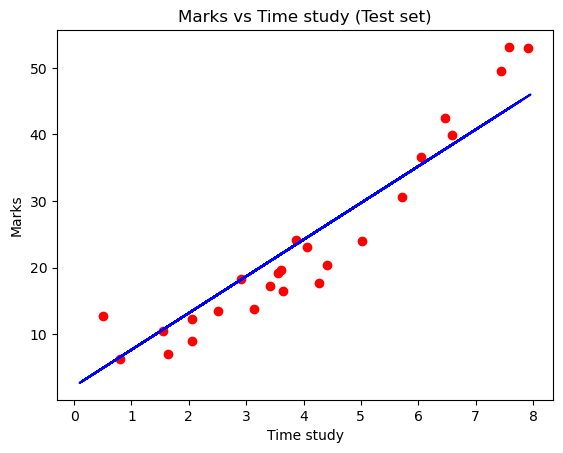

In [40]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marks vs Time study (Training set)')
plt.xlabel('Time study')
plt.ylabel('Marks')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marks vs Time study (Test set)')
plt.xlabel('Time study')
plt.ylabel('Marks')
plt.show()

In [41]:
time_study = [[1.5]]
your_mark = regressor.predict(time_study)
print(your_mark)

[10.39476473]


### Контрольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

    Ответ: В линейной регрессии масштабирование признаков не обязательно, потому что коэффициенты регрессии компенсируют масштабирование. Масштабирование может помочь ускорить обучение, но не является обязательным.
2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?

    Ответ: Квадратичную функцию легче оптимизировать.
3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

    Ответ:  Метод подбирает оптимальные коэффициенты регрессии, чтобы минимизировать функцию потерь на обучающих данных X (признаки) и y (целевая функция).
4. Поясните назначение метода predict класса LinearRegression.

    Ответ: Этот метод ннужен для предсказания знацения целевой функции на множестве X, используя полученные в результате обучения коэффиценты регрессии.
5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

    Ответ: Тестовой